# EOSC 213 — Lecture 2: Python Refresher (NumPy, Matplotlib, PyTorch Basics)

This notebook is designed for **live coding** in class.  
It focuses on the fundamentals you'll use throughout the term:

- Python basics (variables, types, functions, loops)
- **NumPy** arrays for scientific computing
- **Matplotlib** for quick visualization
- **PyTorch** tensors (as a numerical computing library (**we are not doing full-fledged deep learning in this course, but we will need this for optimization**)
- **Loops vs vectorization** (why vectorized code is much faster)
- Useful extras: broadcasting, matrix–vector products, norms, masking, basic debugging

> Tip: Run cells top-to-bottom (Kernel → Restart & Run All is a good habit).


## Disable AI Autocomplete and Chat in VS Code

For this course, please **disable all AI coding assistance** (e.g., Copilot, AI chat).

### 1. Disable GitHub Copilot
- VS Code → **Extensions**
  - macOS / Windows: `Cmd+Shift+X` / `Ctrl+Shift+X`
- Search **GitHub Copilot**
- ⚙️ → **Disable** (for this workspace or globally)

### 2. Disable GitHub Copilot Chat
- Extensions → **GitHub Copilot Chat**
- ⚙️ → **Disable**

### 3. Disable built-in AI chat features
- Open **Settings**
  - **macOS:** `Cmd + ,`
  - **Windows/Linux:** `Ctrl + ,`
- Go to: `User > Features > Chat`
- Turn on **Disable AI Features**

### Check
You should no longer see ghost text, AI suggestions (autocomplete), or chat responses.

## 0. Imports and environment check

In [9]:

import time
import math
import numpy as np
import matplotlib.pyplot as plt
import torch

#%%%
# print version of libraries
# print("Hello world")
# a = 1
# print("a = ", a)
print("Numpy:", np.__version__)
print('Matplotlib:', plt.matplotlib.__version__)
print('Pytorch:', torch.__version__)

Numpy: 2.4.0
Matplotlib: 3.10.8
Pytorch: 2.9.1


## 1. Python basics: variables, types, lists vs arrays

In [14]:
# Variables and basic types
a = 1     # int
b = 1.0    # float
c = 2 + 3j        # complex

# print types and values
print(type(a), a)
print(type(b), b)
print(type(c), c)

# Different ways to format print output
print("a=", a)
# f-string formatting
print(f"a={a}")

<class 'int'> 1
<class 'float'> 1.0
<class 'complex'> (2+3j)
a= 1
a=1


In [18]:
# Python list (not a mathematical vector)
L = [1, 'eosc213', 'Vancouver is rainy']
len(L)

3

In [23]:
# NumPy array (vector-like mathematical object)
a = np.array([1, 2, 3])
print(4*a)
print(4*L)

[ 4  8 12]
[1, 'eosc213', 'Vancouver is rainy', 1, 'eosc213', 'Vancouver is rainy', 1, 'eosc213', 'Vancouver is rainy', 1, 'eosc213', 'Vancouver is rainy']


In [ ]:
# The effect of multiplying a list and a numpy array by a scalar 


## 2. NumPy arrays: creation, shape, indexing, elementwise ops

In [29]:
# Create a discretized array x from 0 to 2π and compute y = sin(x)
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)
print(y)
print(y[0:5])

[ 0.00000000e+00  6.28943332e-03  1.25786178e-02  1.88673048e-02
  2.51552454e-02  3.14421909e-02  3.77278927e-02  4.40121020e-02
  5.02945704e-02  5.65750492e-02  6.28532900e-02  6.91290446e-02
  7.54020646e-02  8.16721019e-02  8.79389084e-02  9.42022363e-02
  1.00461838e-01  1.06717465e-01  1.12968871e-01  1.19215809e-01
  1.25458030e-01  1.31695289e-01  1.37927338e-01  1.44153931e-01
  1.50374822e-01  1.56589764e-01  1.62798512e-01  1.69000820e-01
  1.75196443e-01  1.81385136e-01  1.87566653e-01  1.93740751e-01
  1.99907185e-01  2.06065711e-01  2.12216086e-01  2.18358066e-01
  2.24491409e-01  2.30615871e-01  2.36731210e-01  2.42837185e-01
  2.48933554e-01  2.55020076e-01  2.61096510e-01  2.67162616e-01
  2.73218154e-01  2.79262883e-01  2.85296566e-01  2.91318963e-01
  2.97329837e-01  3.03328948e-01  3.09316061e-01  3.15290939e-01
  3.21253344e-01  3.27203041e-01  3.33139795e-01  3.39063370e-01
  3.44973534e-01  3.50870051e-01  3.56752688e-01  3.62621214e-01
  3.68475395e-01  3.74315

In [30]:
# Elementwise ops


## 3. Matplotlib quick plotting (diagnostic mindset)

Text(0.5, 1.0, 'Matplotlib plotting')

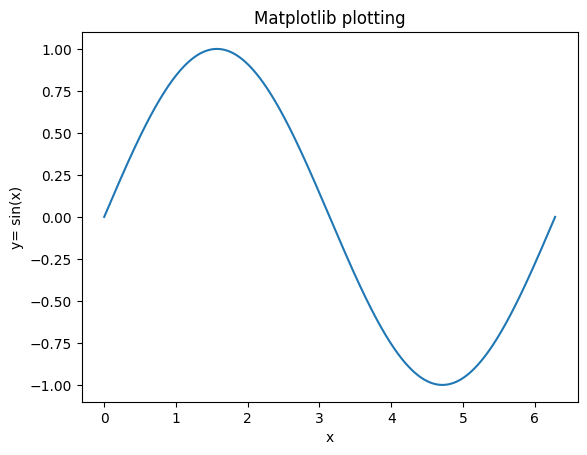

In [33]:
# Plotting 
plt.figure()
plt.plot(x, y, label="sin(x)")
plt.xlabel('x')
plt.ylabel('y= sin(x)')
plt.title('Matplotlib plotting')


## 4. Functions: write once, use many times

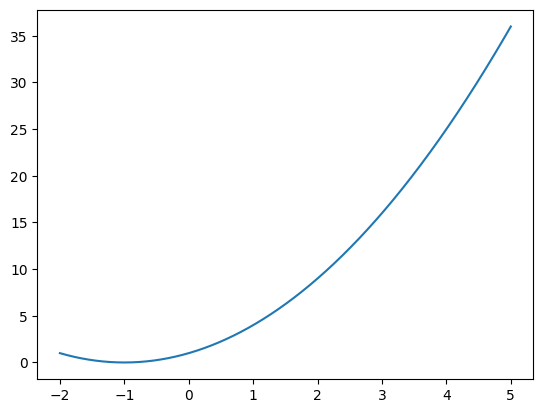

In [35]:
# define a function 
def f(x):
    return x**2 + 2*x + 1

x = np.linspace(-2, 5, 1000)
y = f(x)

plt.figure()
plt.plot(x, y)


## 5. Loops vs vectorization (NumPy)

We often want to compute something like **y = x²**.  
There are two ways:

1. **Loop** over elements (slow in Python). A Python loop runs in the interpreter; overhead in every iteration
2. **Vectorize** using NumPy. Vectorized ops call optimized compiled code (C/Fortran/C++) hence faster. Better use of CPU cache and SIMD instructions (knowing the details for this is not important for this course)


In [37]:
# Define x 
x = np.linspace(0, 10, 1_000_000)

# Loop version

y_loop = np.zeros_like(x)
t0 = time.time()
for i in range(len(x)):
    y_loop[i] = x[i]**2 
time_loop = time.time() - t0
print(f"Loop time: {time_loop} s")



Loop time: 0.09716987609863281 s


In [40]:
# Vectorized version
t0 = time.time()
y = x**2 
time_vectorized = time.time() - t0
print(f"Vectorized time: {time_vectorized} s")
print(f'Speed up:{time_loop/time_vectorized}')


Vectorized time: 0.0013661384582519531 s
Speed up:71.12739965095986


## 6. PyTorch tensors: creating tensor with explicit values, dtype, shape, special tensors
### Tensor creation

In [51]:
# Tensor creation
A = torch.tensor([[1,2], [4,5], [7,8]])
print(A.shape)
print(A.dtype)
print(A)
A_np = A.numpy()
print(A_np)

torch.Size([3, 2])
torch.int64
tensor([[1, 2],
        [4, 5],
        [7, 8]])
[[1 2]
 [4 5]
 [7 8]]


### Changing tensor dimensions and flattening

`unsqueeze` adds a dimension, `squeeze` removes singleton dimensions, `flatten` converts a tensor of any shape to a single dimension tensor. 

In [61]:
# squeeze and unsqueeze operations 
A = torch.tensor([[1,2], [4,5], [7,8]])
print(A.shape)
A = A.unsqueeze(dim=0)
print(A.shape)
A = A.squeeze(dim=0)
print(A.shape)
A = A.flatten()
print(A)


torch.Size([3, 2])
torch.Size([1, 3, 2])
torch.Size([3, 2])
tensor([1, 2, 4, 5, 7, 8])


### Special tensors

Commonly used tensors initialized with zeros, ones, or random values.

In [66]:
# Zeros, Ones, Random Tensors  
ZeroTensor = torch.zeros(2,3)
print(ZeroTensor)
OneTensor = torch.ones(3,3, 3,4)
print(OneTensor)
RandTensor = torch.randn(3,3)
print(RandTensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]],


        [[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]],


        [[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]],

         [[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])
tensor([[ 0.3930,  1.1572, -1.8650],
        [-0.5483,  0.0941, -0.8282],
        [-0.3167,  1.6503,  0.7939]])


### More tensor creation and manipulation


In [73]:
# masking and indexing
K = torch.randn(5,5)
print(K)
M = torch.zeros(5,5)
print(M)
M[1:4, 1:4] = 1
print(M)

N = M * K 
print(N)

nonzero_idx = N != 0
print(nonzero_idx)
J = N[nonzero_idx].view(3,3)
print(J)

row_means = torch.mean(J, dim=1)
column_means = torch.mean(J, dim=0)
print(f"Row means: {row_means}")
print(f"Column means: {column_means}")

tensor([[-0.0435,  0.0450, -0.4037, -0.1259, -0.5161],
        [ 1.2996, -0.9754,  0.8276, -0.1851, -0.4665],
        [-1.8277, -0.9756,  0.0645,  0.8115, -0.8235],
        [-1.5860,  0.3228,  2.0884,  0.4761,  0.0175],
        [ 0.6355,  1.4771, -0.5717,  0.7230, -0.7449]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [0., 1., 1., 1., 0.],
        [0., 0., 0., 0., 0.]])
tensor([[-0.0000,  0.0000, -0.0000, -0.0000, -0.0000],
        [ 0.0000, -0.9754,  0.8276, -0.1851, -0.0000],
        [-0.0000, -0.9756,  0.0645,  0.8115, -0.0000],
        [-0.0000,  0.3228,  2.0884,  0.4761,  0.0000],
        [ 0.0000,  0.0000, -0.0000,  0.0000, -0.0000]])
tensor([[False, False, False, False, False],
        [False,  True,  True,  True, False],
        [False,  True,  True,  True, False],
        [Fa

In [ ]:
A = torch.randn(3,2)
print(A)
B = A.view(-1, 6)
print(B)

tensor([[ 0.9251, -1.7582],
        [ 1.0044,  0.6650],
        [-0.4094,  1.1108]])
tensor([[ 0.9251, -1.7582,  1.0044,  0.6650, -0.4094,  1.1108]])


## 7. Matplotlib with PyTorch tensors

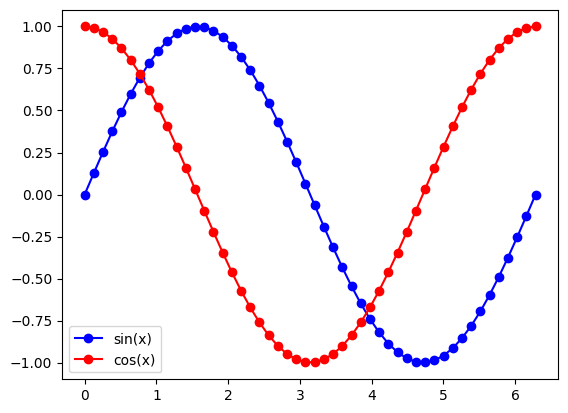

In [85]:
# Plotting tensor with matplotlib
plt.figure()
x = torch.linspace(0, 2*np.pi, 50)
y = torch.sin(x)
z = torch.cos(x)
plt.plot(x, y, '-o', label='sin(x)', color='blue')
plt.plot(x, z, '-o', label='cos(x)', color='red')

plt.legend()
plt.show()


## 8. Broadcasting (why vectorization works)

Broadcasting lets arrays/tensors of different shapes interact without explicit loops.

In [88]:
# Add a scalar to a tensor (performs elementwise addition)
A = torch.rand(5)
B = torch.tensor([3,3,3,3,3])
C_ = A + B
print(A)
b = 3 
C = A + b 
print(C)
print(C_)

tensor([0.2108, 0.6630, 0.2108, 0.5920, 0.4303])
tensor([3.2108, 3.6630, 3.2108, 3.5920, 3.4303])
tensor([3.2108, 3.6630, 3.2108, 3.5920, 3.4303])


In [91]:
# Add a 1D tensor to a 2D tensor (broadcasting) 
A = torch.rand(4,3)
print(f"A={A}")
B = torch.tensor([1.0, 2.0, 3.0])
print(f"B={B}")

C = A + B 

print(f"C={C}")

A=tensor([[0.7784, 0.3013, 0.2221],
        [0.0207, 0.4172, 0.4302],
        [0.2319, 0.6547, 0.2521],
        [0.8242, 0.3006, 0.5600]])
B=tensor([1., 2., 3.])
C=tensor([[1.7784, 2.3013, 3.2221],
        [1.0207, 2.4172, 3.4302],
        [1.2319, 2.6547, 3.2521],
        [1.8242, 2.3006, 3.5600]])


## 9. Matrix–vector multiplication (preview of linear algebra in the course)

In [93]:
# Matrix-vector product 
A = torch.randn(4,4)
x = torch.randn(4)
print(A)
print(x)


y = A @ x
print(y) 
y1 = A*x 
print(y1)

tensor([[-0.0195,  1.5422, -1.4091,  0.2512],
        [-0.1034, -0.9935, -0.2218,  1.8920],
        [ 1.1896,  0.4266, -0.5188,  0.1174],
        [-0.8879,  0.3756, -0.2158,  0.5530]])
tensor([ 1.6729,  0.1641, -0.6292, -0.2932])
tensor([ 1.0332, -0.7513,  2.3520, -1.4501])
tensor([[-0.0327,  0.2531,  0.8865, -0.0737],
        [-0.1730, -0.1630,  0.1395, -0.5548],
        [ 1.9900,  0.0700,  0.3264, -0.0344],
        [-1.4854,  0.0616,  0.1358, -0.1621]])


## 10. Reductions: sum, mean, norm (used for error/residuals)

In [94]:
# sum and mean reduction operations
x = torch.linspace(1, 10, 20)
print(x.sum())
print(x.mean())


tensor(110.)
tensor(5.5000)


## 11. Boolean masks (indexing subsets without loops)

In [97]:
# boolean masking 

x = torch.linspace(-2, 2, 21)
print(x)
mask = x > 0 
print(mask)
print(x[mask]) 



tensor([-2.0000e+00, -1.8000e+00, -1.6000e+00, -1.4000e+00, -1.2000e+00,
        -1.0000e+00, -8.0000e-01, -6.0000e-01, -4.0000e-01, -2.0000e-01,
        -2.9802e-08,  2.0000e-01,  4.0000e-01,  6.0000e-01,  8.0000e-01,
         1.0000e+00,  1.2000e+00,  1.4000e+00,  1.6000e+00,  1.8000e+00,
         2.0000e+00])
tensor([False, False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True])
tensor([0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000, 1.8000,
        2.0000])


## 12. Loops vs vectorization (PyTorch) + timing

Same story as NumPy: **avoid Python loops** when operating on arrays/tensors.

We’ll time a simple operation: **y = sin(x) + x²**.


In [98]:
# define x 
x = torch.linspace(0, 10, 1_000_000)

def f(x):
    return torch.sin(x) + x**2

# Loop version
y_loop = torch.zeros_like(x)
t0 = time.time()
for i in range(len(x)):
    y_loop[i] = f(x[i])
time_loop = time.time() - t0
print(f"Loop time: {time_loop} s")

Loop time: 3.1216320991516113 s


In [100]:
# Vectorized version
t0 = time.time()
y_vec = f(x)
time_vec = time.time() - t0
print(f"Vec time: {time_vec} s")
print(f"Speedup: {time_loop/ time_vec}")

Vec time: 0.0015270709991455078 s
Speedup: 2044.1957845433255


## 13. Creating grids with meshgrid


In [ ]:
# create x and y ranges and X, Y meshgrid arrays

x = torch.arange(4)
y = torch.arange(4)

print(x)
print(y)
X, Y = torch.meshgrid(x, y)
print(X)
print(Y)





tensor([0, 1, 2, 3])
tensor([0, 1, 2, 3])
tensor([[0, 0, 0, 0],
        [1, 1, 1, 1],
        [2, 2, 2, 2],
        [3, 3, 3, 3]])
tensor([[0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3],
        [0, 1, 2, 3]])


## 14. Elementwise operations on grids
### Elementwise operations


In [104]:
# multiple functions of X and Y on meshgrid! 

Z1 = X * Y 
Z2 = (X**2) + Y
Z3 = torch.sin(X) + torch.cos(Y)
Z4 = torch.abs(X)

Text(0.5, 1.0, 'Z4 = |X|')

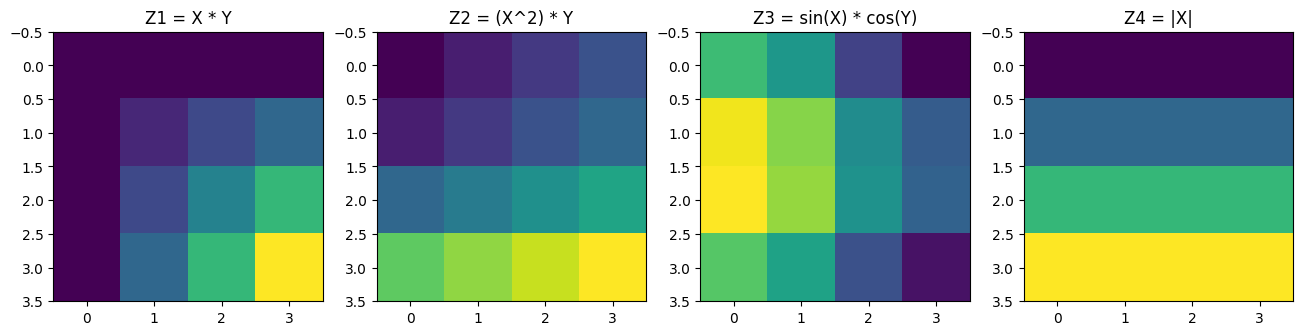

In [105]:
# plot these functions
fig, ax = plt.subplots(1,4, figsize=(16,4))
ax[0].imshow(Z1.numpy())
ax[0].set_title("Z1 = X * Y")
ax[1].imshow(Z2.numpy())
ax[1].set_title("Z2 = (X^2) * Y")
ax[2].imshow(Z3.numpy())
ax[2].set_title("Z3 = sin(X) * cos(Y)")
ax[3].imshow(Z4.numpy())
ax[3].set_title("Z4 = |X|")

## Summary: What you should be comfortable with after Lecture 2

By the end of this lecture, you should be able to:

- Create and manipulate **PyTorch tensors** of different shapes and dimensions
- Understand and reason about **tensor shapes** and indexing
- Define mathematical functions and **evaluate them over arrays/tensors**
- Use **logical masks** to select subsets of data and compute statistics on them
- Perform **elementwise operations** and basic reductions (mean, sum, norm)
- Generate **structured grids** using `meshgrid`
- Plot results using Matplotlib to **diagnose and understand computations**
- Recognize why **vectorized operations** are preferred over explicit Python loops

These skills form the computational foundation for the rest of the course, where we will apply them to:
- numerical solutions of differential equations,
- simulations,
- stability analysis,
- and inverse problems.

## Some good habits while coding (you will thank yourself later)

- Label axes on every plot
- Use small functions instead of copy–paste sections of codes multiple times 
- Check array/tensor shapes frequently (`.shape`, `.ndim`)
- Write clean, readable code  
  *(grading includes clarity, not only correctness)*

**Takeaway:** scientific computing is as much about habits as it is about syntax.